# Python Group
## Wali Chaudhary, Bryce Shurts, & Alex Wright

## 1. Business Understanding

The Hotels Reservation dataset was uploaded by Ahsan Raza on kaggle in an effort to discover patterns in online-booking tendencies of hotel customers. Specifically, if a customer would honor the reservation or if they would eventually cancel it. The data was collected from a single country which cannot be disclosed for privacy reasons as stated by Ahsan in the Kaggle discussion posts.

The datasets description states there have been major issues in the hotel industry in regard to consumer online booking activity. The convenience and low to little cost of cancelling an online-booking has led to a significant change in consumer behavior. There are a larger number of cancellations and rescheduling due to changes of plans, scheduling conflicts, and other unforeseen circumstances. Ahsan describes this convenient cancellation feature as beneficial to hotel guests, but less desirable and possible revenue diminishing for hotels.

One can use this dataset to predict if a consumer will honor their reservation or not. Parties that may be interested in the classification result may be those employed in Hotel Management, or management from any industry that deals with an online reservation system such as restaurants, resorts, or motels. A hotel manager will be able to gain insight as to why certain customers may be more prone to online cancelling and may make better estimations regarding hotel occupancy.

### Citation & Acknowledgement
The Hotels Reservation dataset is liscenced under the [Attribution 4.0 International CC license](https://creativecommons.org/licenses/by/4.0/) and was provided by Ahsan Raza on [Kaggle](https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset). The dataset has been modified through the removal of columns in the pursuit of analyzing the data with regard to perdicting whether or not a given booking with be honored. 

Antonio, N., de Almeida, A., & Nunes, L. (2019). Hotel booking demand datasets. *Data in Brief, 22*, 41–49.
https://doi.org/10.1016/j.dib.2018.11.126 

### 1.1 Measure of Success

So, what defines a successful machine learning algorithm?
Due to the non-critical nature of hotel cancellations, it is safe to assume that a good model should be able to predict more accurately than random occurrence (50/50). For a business with a more aggressive strategy to produce profit, baseline of 80% for the classification rate may be ideal.


## 2. Data Understanding

The dataset contains 19 features, 12 numerical (quantitative) and 7 categorical (qualitative), which can be broken down as such:

- Booking_ID: Qualitative, discrete, & nominal feature; one-hot encoded integer repersentation
- no_of_adults: Quantitative, continuous, & ratio feature; integer repersentation
- no_of_children: Quantitative, continuous, & ratio feature; integer repersentation
- no_of_weekend_nights: Quantitative, continuous, & ratio feature; integer repersentation
- no_of_week_nights: Quantitative, continuous, & ratio feature; integer repersentation
- type_of_meal_plan: Qualitative, discrete, & ordinal feature; integer repersentation
- required_car_parking_space: Qualitative, discrete, & nominal feature; binary repersentation
- room_type_reserved: Qualitative, discrete, & ordinal feature; integer repersentation
- lead_time: Quantitative, continuous, & ratio feature; integer repersentation
- arrival_year: Quantitative, discrete, & ordinal feature; integer repersentation
- arrival_month: Quantitative, discrete, & ordinal feature; integer repersentation
- arrival_date: Quantitative, discrete, & ordinal feature; integer repersentation
**Could be argued as nominal depending on how we apply it**
- market_segment_type: Qualitative, discrete, & nominal feature; one-hot encoded integer repersentation
**Maybe it could be argued as ordinal? Not sure if there's really a clear hierarchy in the data**
- repeated_guest: Qualitative, discrete, & nominal feature; binary repersentation
- no_of_previous_cancellations: Quantitative, continuous, & ratio feature; integer repersentation
- no_of_previous_bookings_not_canceled: Quantitative, continuous, & ratio feature; integer repersentation
- avg_price_per_room: Quantitative, continuous, & ratio feature; float repersentation
- no_of_special_requests: Quantitative, continuous, & ratio feature; integer repersentation
- booking_status: Qualitative, discrete, & nominal feature; binary repersentation

<sub> Plain english feature definitions can be sourced from the original dataset's listing at https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset in the Details section </sub>

In [10]:
import pandas as pd
import numpy as np

# Typings
from pandas import ( DataFrame, Series )
from numpy import ndarray

df: DataFrame = pd.read_csv("Hotel Reservations.csv")

### 2.1 Data Description

In [11]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [12]:
# Define data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

#### Get some statistics about the data set

In [13]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


### 2.2 Data Quality

After analyzing the data in the following graphs, we find that there is no missing data and that nothing will need to be imputed into our dataset.

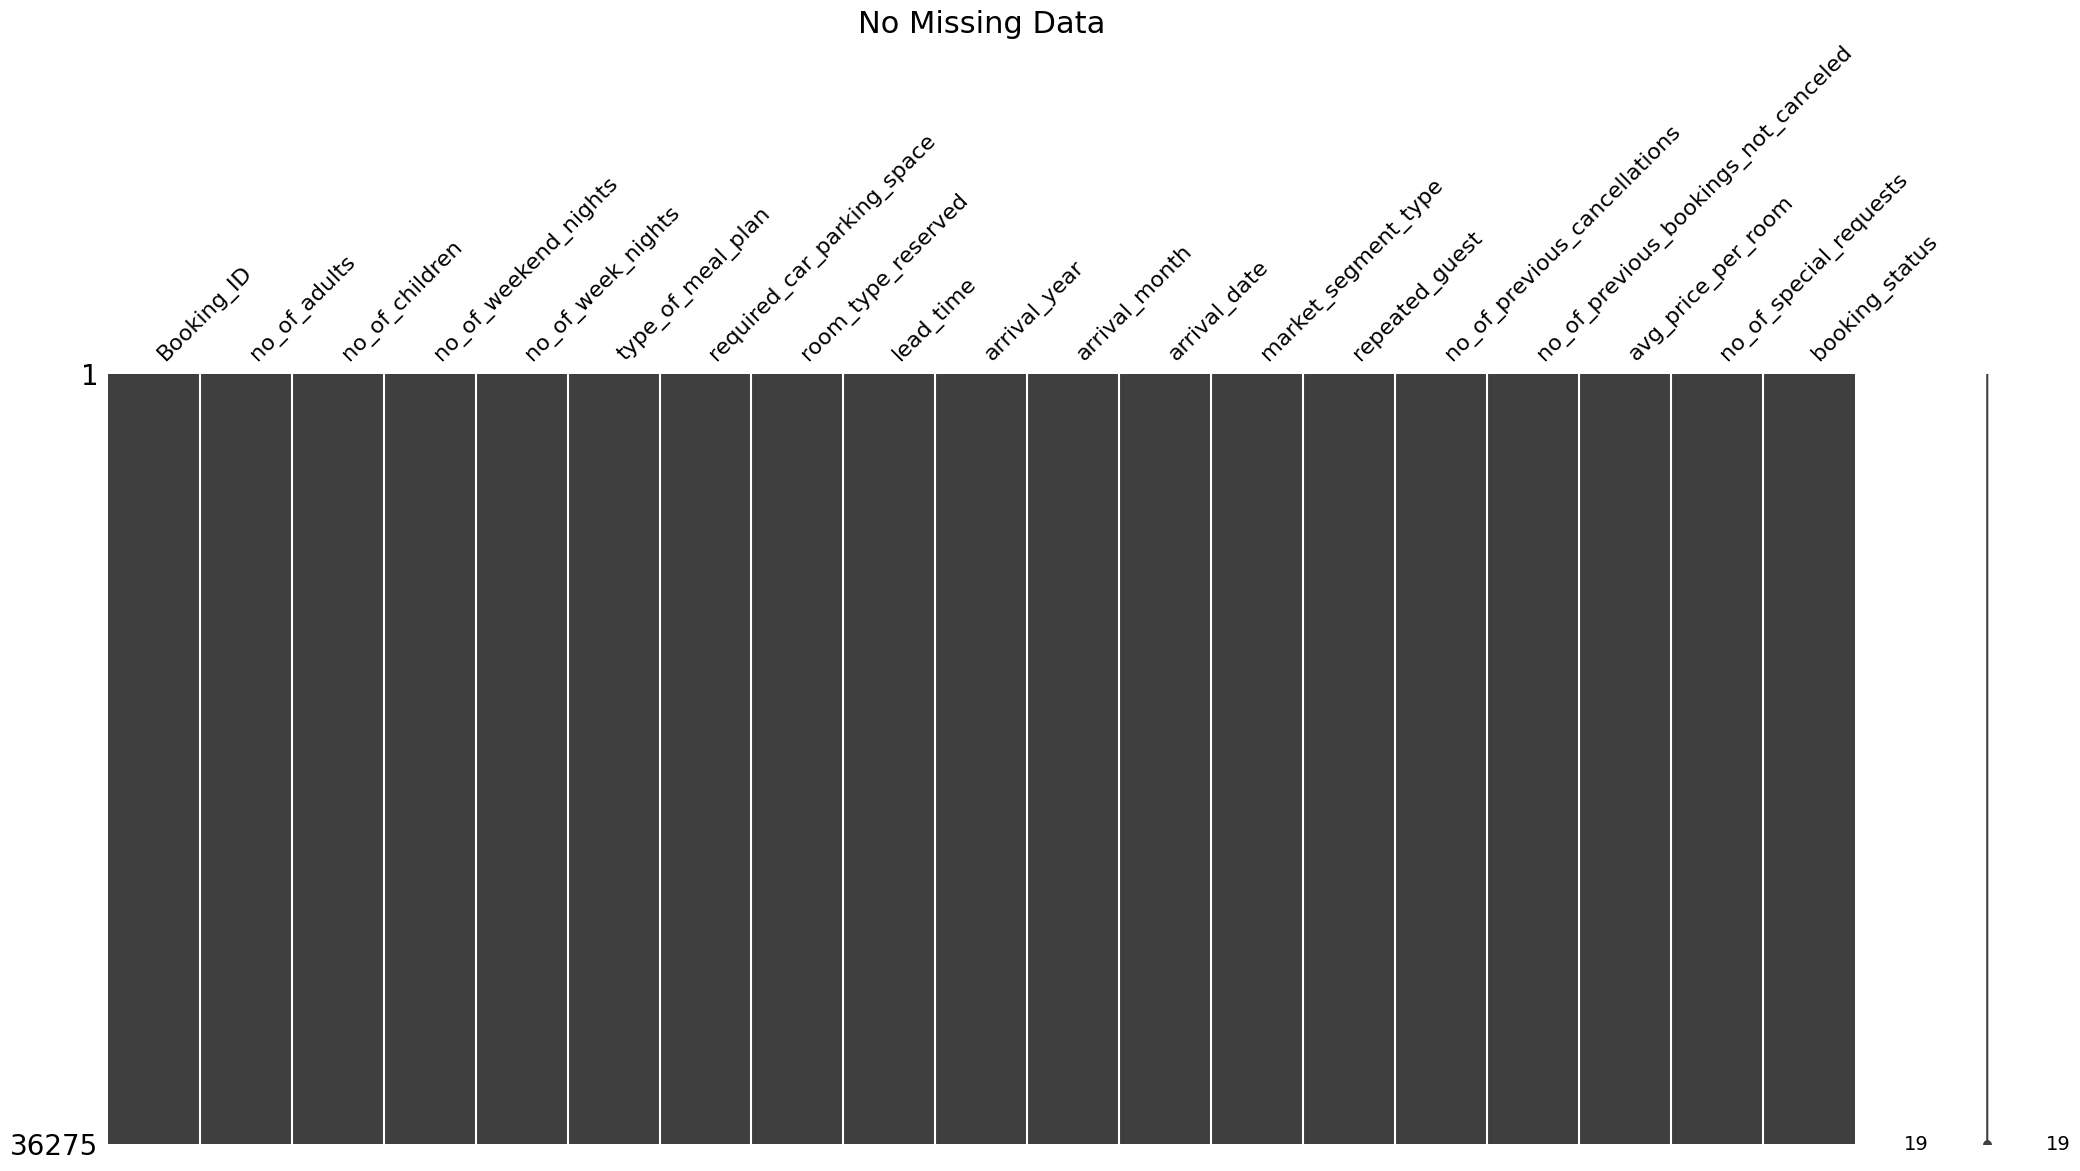

In [14]:
import matplotlib
import matplotlib.pyplot as plt
import warnings
import pandas as pd

warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline
import missingno as mn

df = pd.read_csv("Hotel Reservations.csv")
mn.matrix(df)
plt.title("No Missing Data", fontsize=22)
plt.show()


In [15]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

#### Duplicate entries
The dataset labels each entry with a unique ID that is associated with a booking entry by INNHotels, the hotel chain the data was sourced from. As such, we can be confident that the dataset does not contain any duplicate entries, vis-à-vis multiple entries repersenting the same booking. 

#### Other invalid data
While duplicates may not be a chief concern, there is still the need to consider whether or not the data present in the dataset is entirely valid. For this purpose, we can do some basic sanity checking of the data:

In [16]:
# List all arrival years; any before 2017 or after 2018 would be invalid:
print("Invalid data from before 2017: " + str(df["arrival_year"].lt(2017).any()))
print("Invalid data from after 2018:  " + str(df["arrival_year"].gt(2018).any()))

# Rename columns to match expected values of to_datetime() function
df.rename(columns= {"arrival_year": "year", "arrival_month": "month", "arrival_date": "day"}, inplace=True)

# Check for any dates that are invalid for the month
# In place to avoid needing to make too many new dataframes
# TODO: avoid making temporary list
temp = pd.to_datetime(df[["year", "month", "day"]], errors = "coerce")
print("Invalid dates exist:           " + str(temp.isnull().any())) # True means there are invalid dates somewhere
df.drop(axis=1, index=temp[temp.isnull()].index, inplace=True)

Invalid data from before 2017: False
Invalid data from after 2018:  False
Invalid dates exist:           True


#### Formatting data for machine learning

Because the Booking_ID column is different for every single row, it is likely to not have statistical significance as there are no relationships to it besides only from the row it's associated with. We can go ahead and drop it.

In [81]:
df.drop('Booking_ID', axis=1, inplace=True)

In [82]:
df['market_segment_type'].value_counts()

Online           23194
Offline          10518
Corporate         2011
Complementary      390
Aviation           125
Name: market_segment_type, dtype: int64

We see that Online reservations have a high cancellation rate, while corporate and complementary reservations see low cancellation rates

Some graphs from:
https://www.kaggle.com/code/effortno11/beginner-friendly-eda-model-comparison#Data-Analysis

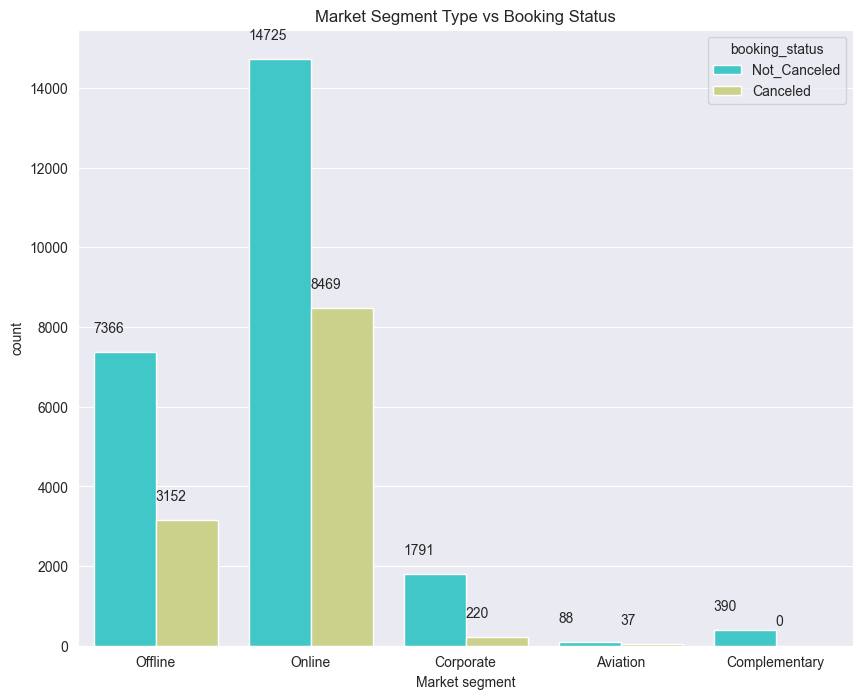

In [87]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")

ax = sns.countplot(data=df, x='market_segment_type', hue='booking_status', palette='rainbow')
plt.title('Market Segment Type vs Booking Status')
plt.xlabel('Market segment')
plt.ylabel('count')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+500))
plt.show()

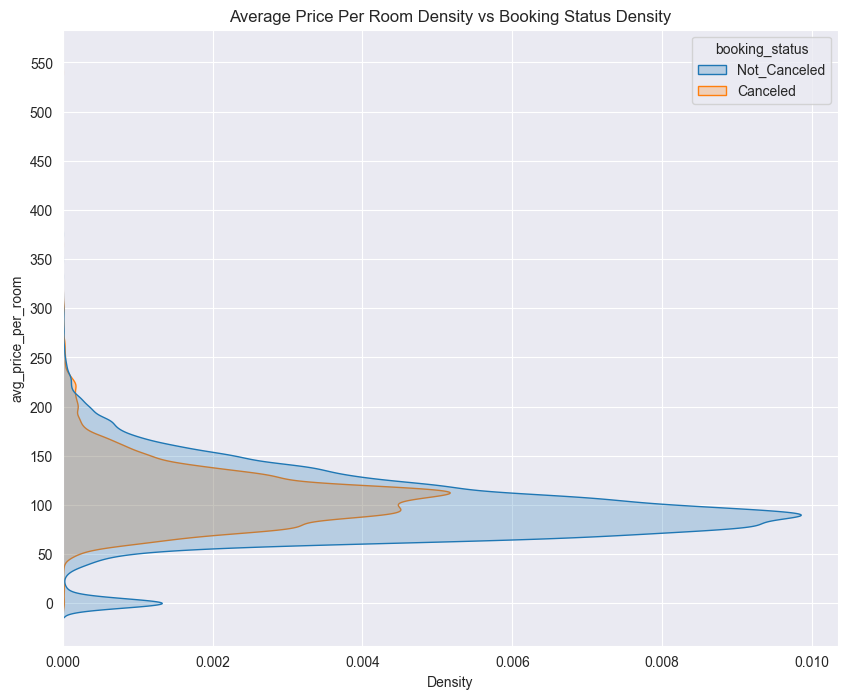

In [88]:
plt.figure(figsize=(10,8))
x=sns.kdeplot(data=df,y='avg_price_per_room',hue='booking_status',fill=True,gridsize=1000)
x.set_yticks(range(0,600,50))
x.set_title("Average Price Per Room Density vs Booking Status Density")
plt.show()

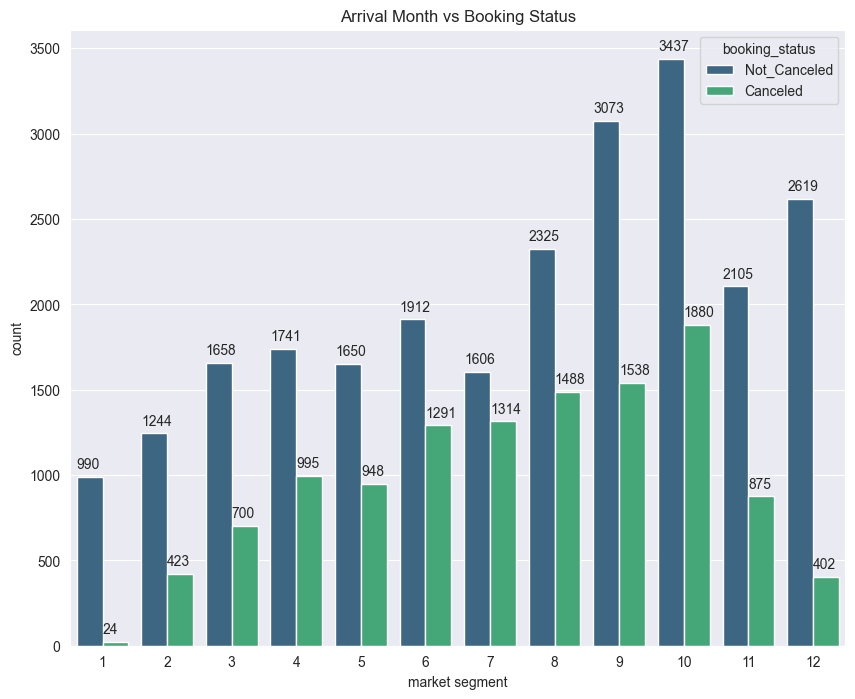

In [89]:
# on the basis of arrival_month 
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
ax=sns.countplot(data=df,x='month',hue='booking_status',palette='viridis')
plt.title('Arrival Month vs Booking Status')
plt.xlabel('market segment')
plt.ylabel('count')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+50))

In [90]:
# Encode class labels

# Find the unique class label values (should be 'Canceled' and
# 'Not Canceled'), and transform the dataframe to include those
bk_status_mapping = {
    label: idx for idx, label in enumerate(np.unique(df.booking_status))
}
df.booking_status: Series = df.booking_status.map(bk_status_mapping)
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,year,month,day,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,1
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,1
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,0
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,0
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,0


In [91]:
# Now lets one-hot encode any ordinal categorical features such as
# type_of_meal_plan, room_type_reserved, arrival_year, market_segment_type

# TODO: Wali
# Are months & days also nominal data? Check back on this

# I would say they're ordinal, espeically months: the months have a structure
# that repersents the progression of the seasons which could affect whether
# someone cancels a booking or not (e.g., the later/winter months 11-2 might
# have more cancellations due to bad weather in winter preventing travel).
# Days... could probably be nominal without affecting too much. Could even make
# them interval or ratio depending on the context.
# Just my 0.02 - Bryce
df = pd.concat([df, pd.get_dummies(df[['type_of_meal_plan', 'room_type_reserved', 'year', 'market_segment_type']])], axis=1)
df.drop(['type_of_meal_plan', 'room_type_reserved', 'year', 'market_segment_type'], axis=1, inplace=True)
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,month,day,repeated_guest,no_of_previous_cancellations,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,10,2,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,0,2,3,0,5,11,6,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,2,1,0,1,2,28,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2,0,0,2,0,211,5,20,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2,0,1,1,0,48,4,11,0,0,...,0,0,0,0,0,0,0,0,0,1


In [92]:
print(df.dtypes)
print('========')
print(df.info())

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
required_car_parking_space                int64
lead_time                                 int64
month                                     int64
day                                       int64
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                            int64
type_of_meal_plan_Meal Plan 1             uint8
type_of_meal_plan_Meal Plan 2             uint8
type_of_meal_plan_Meal Plan 3             uint8
type_of_meal_plan_Not Selected            uint8
room_type_reserved_Room_Type 1            uint8
room_type_reserved_Room_Type 2            uint8
room_type_reserved_Room_Type 3          

## 3. Data visualization

A majority of bookings originate from online bookings, and online bookings also account for a majority of the cancellations in number. Percentage wise corporate bookings are the least reliable, but are relatively small in comparison. There is not a strong connection between the cost of the room and the rate of cancellations. The most business comes in during the late summer and fall, which likely corresponds with favorable weather, but there is relatively similar cancellation rates throughout the year with an exception for January and December which saw large deltas percentage wise.


#### Correlation between different columns

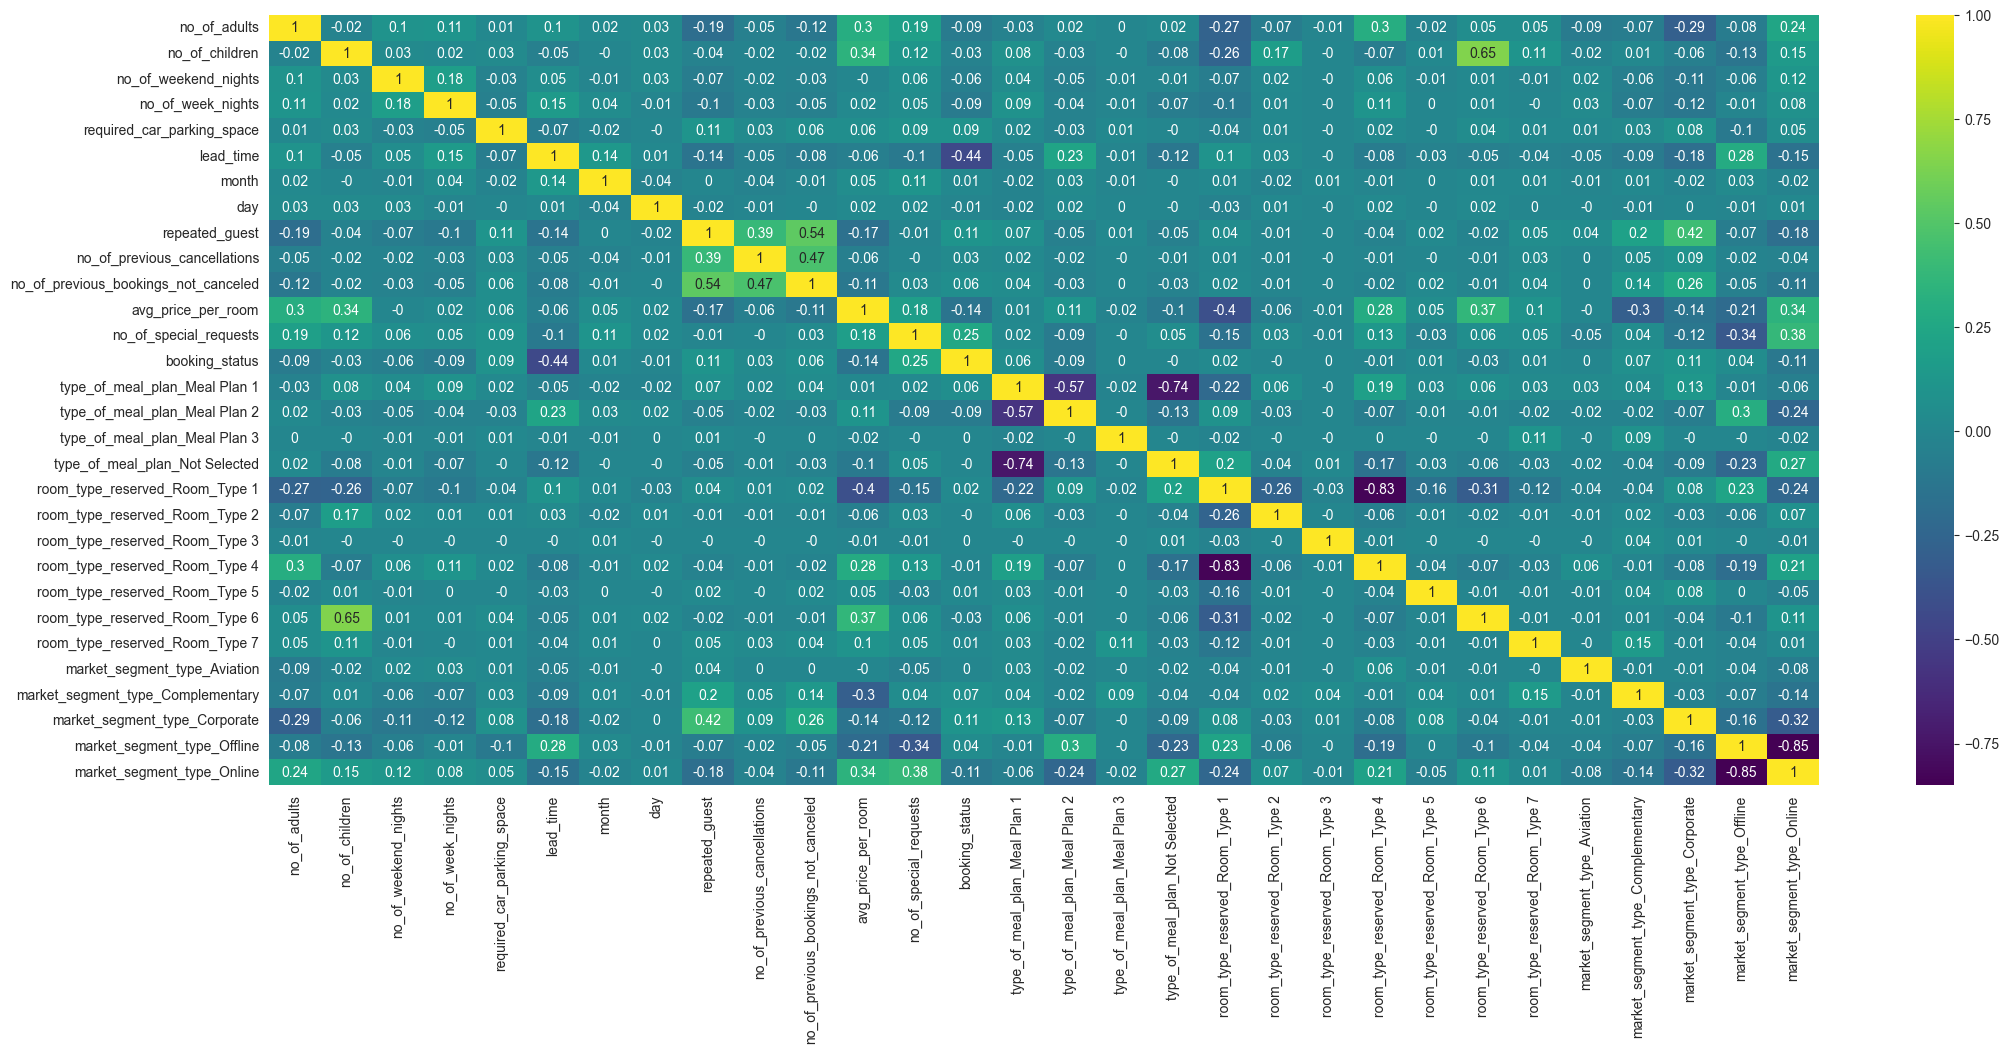

In [93]:
import seaborn as sns
correlation = df.corr().round(2)
plt.figure(figsize = (25,10))
sns.heatmap(correlation, annot = True, cmap = 'viridis')
plt.show()

#### Correlation with booking status

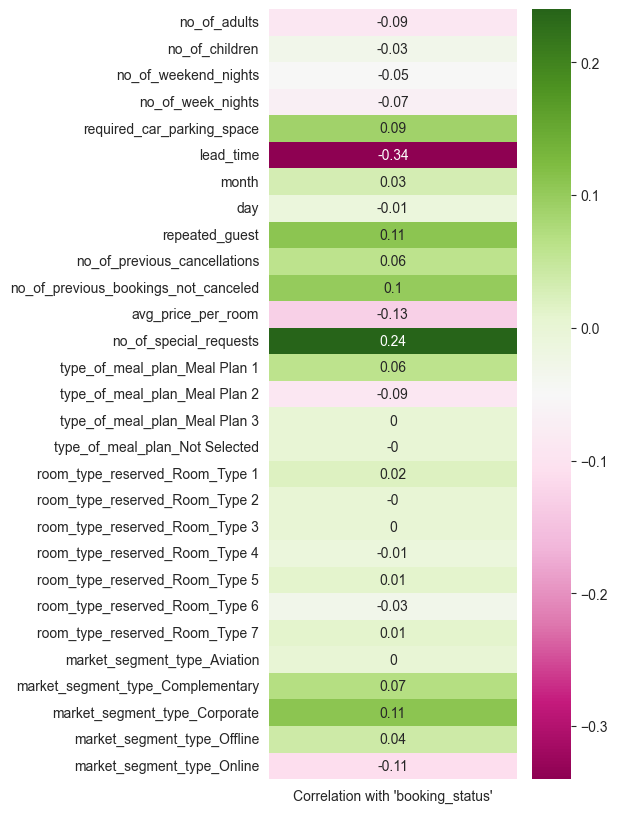

In [94]:
# Use Kendall's correlation since some data is ordinal & not continuous (req. for Pearson)
# TODO: use either Pearson or Kendall depending on categorization of data
correlation = df.loc[:, df.columns != "booking_status"].corrwith(df["booking_status"], method = "kendall", numeric_only = True).round(2)
plt.figure(figsize = (4,10))
sns.heatmap(correlation.to_frame("Correlation with 'booking_status'"), annot = True, cmap = 'PiYG')
plt.show()

#### Principal Component Analysis

Before actually launching into the PCA work, we first want to examine the dataset as a whole. By doing so, we hope to gain insight into the distribution of data across our features, which may inform our later normalization. If the data is siginifcantly skewed, for instance, we may want to perform log scaling or sample clipping on certain features prior to computing a z-score normalization.

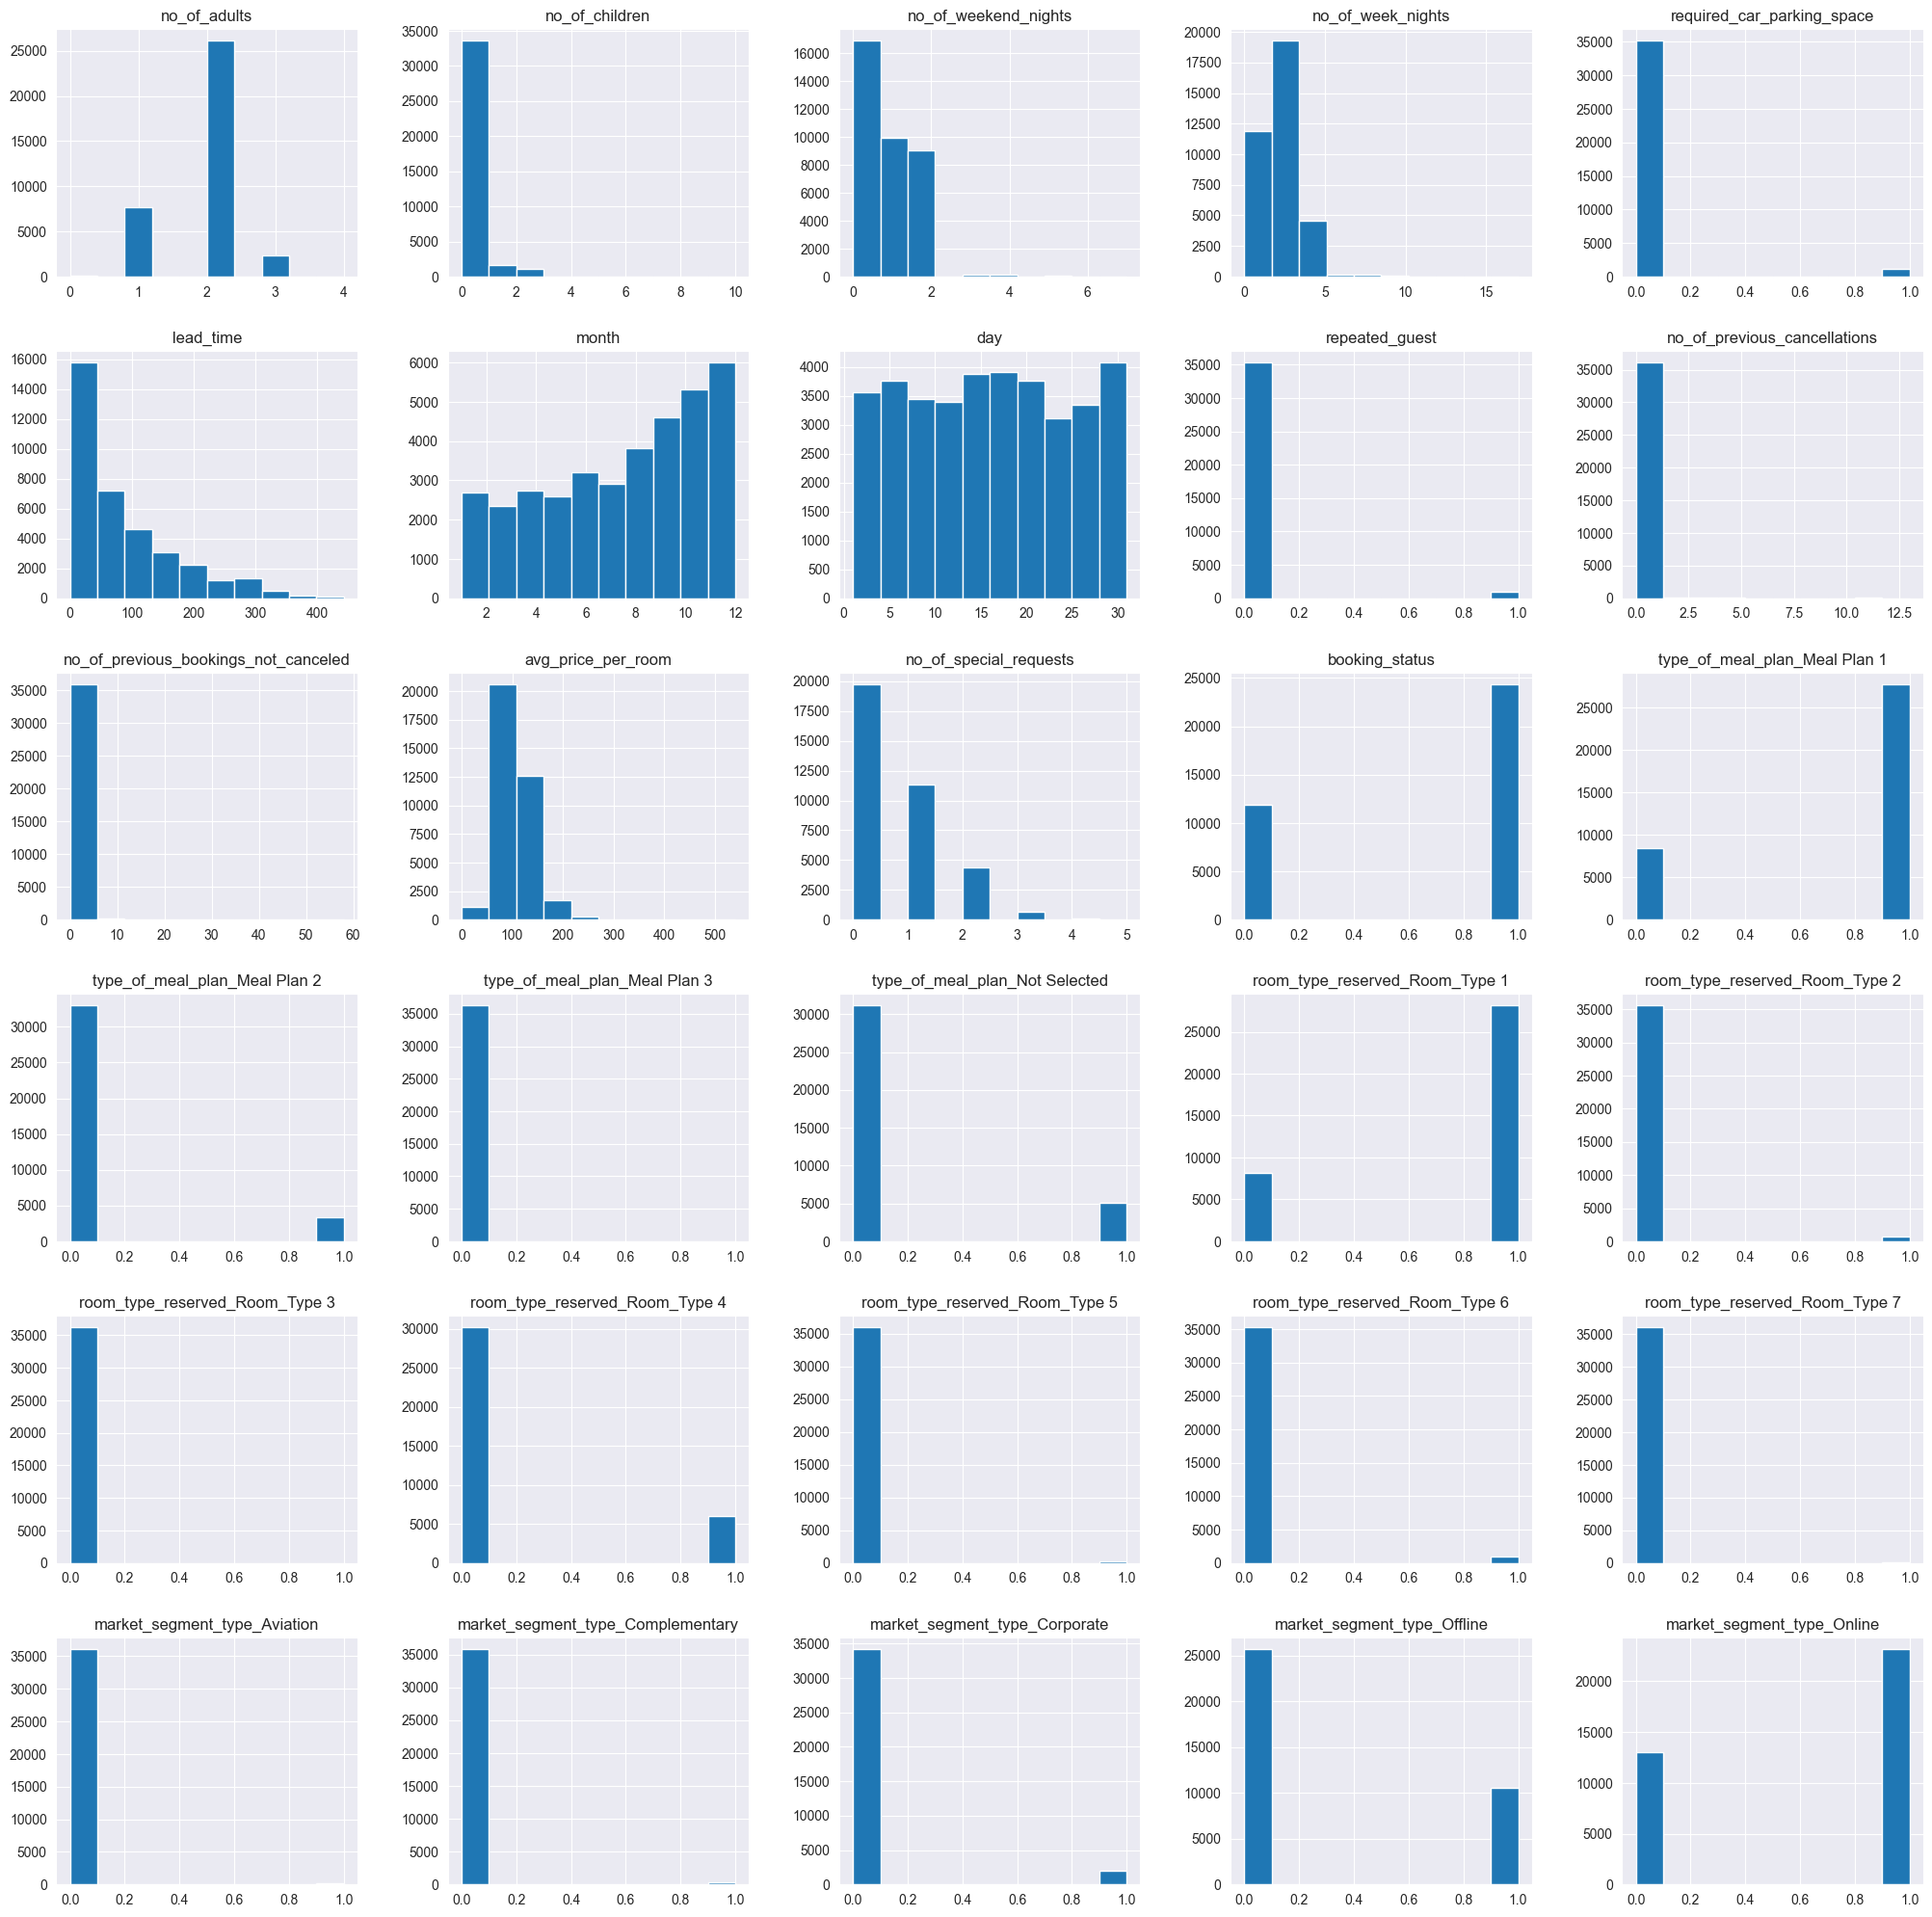

In [95]:
df.hist(figsize=(25,25))
plt.show()

TODO (Bryce): Add some analysis once our other methods for dimension reduction are implemented

In [96]:
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
#TODO (Bryce): Potentially add some extra scaling/normalization features.
df_normalized = pd.DataFrame(MinMaxScaler().fit_transform(df), columns=df.columns)
df_normalized.astype("float32", copy=False).dtypes # Move to half-precision floats for speed

no_of_adults                            float32
no_of_children                          float32
no_of_weekend_nights                    float32
no_of_week_nights                       float32
required_car_parking_space              float32
lead_time                               float32
month                                   float32
day                                     float32
repeated_guest                          float32
no_of_previous_cancellations            float32
no_of_previous_bookings_not_canceled    float32
avg_price_per_room                      float32
no_of_special_requests                  float32
booking_status                          float32
type_of_meal_plan_Meal Plan 1           float32
type_of_meal_plan_Meal Plan 2           float32
type_of_meal_plan_Meal Plan 3           float32
type_of_meal_plan_Not Selected          float32
room_type_reserved_Room_Type 1          float32
room_type_reserved_Room_Type 2          float32
room_type_reserved_Room_Type 3          

Now that our data is normalized, we must identify the structure of our data to determine if a linear or non-linear PCA is more appropiate.

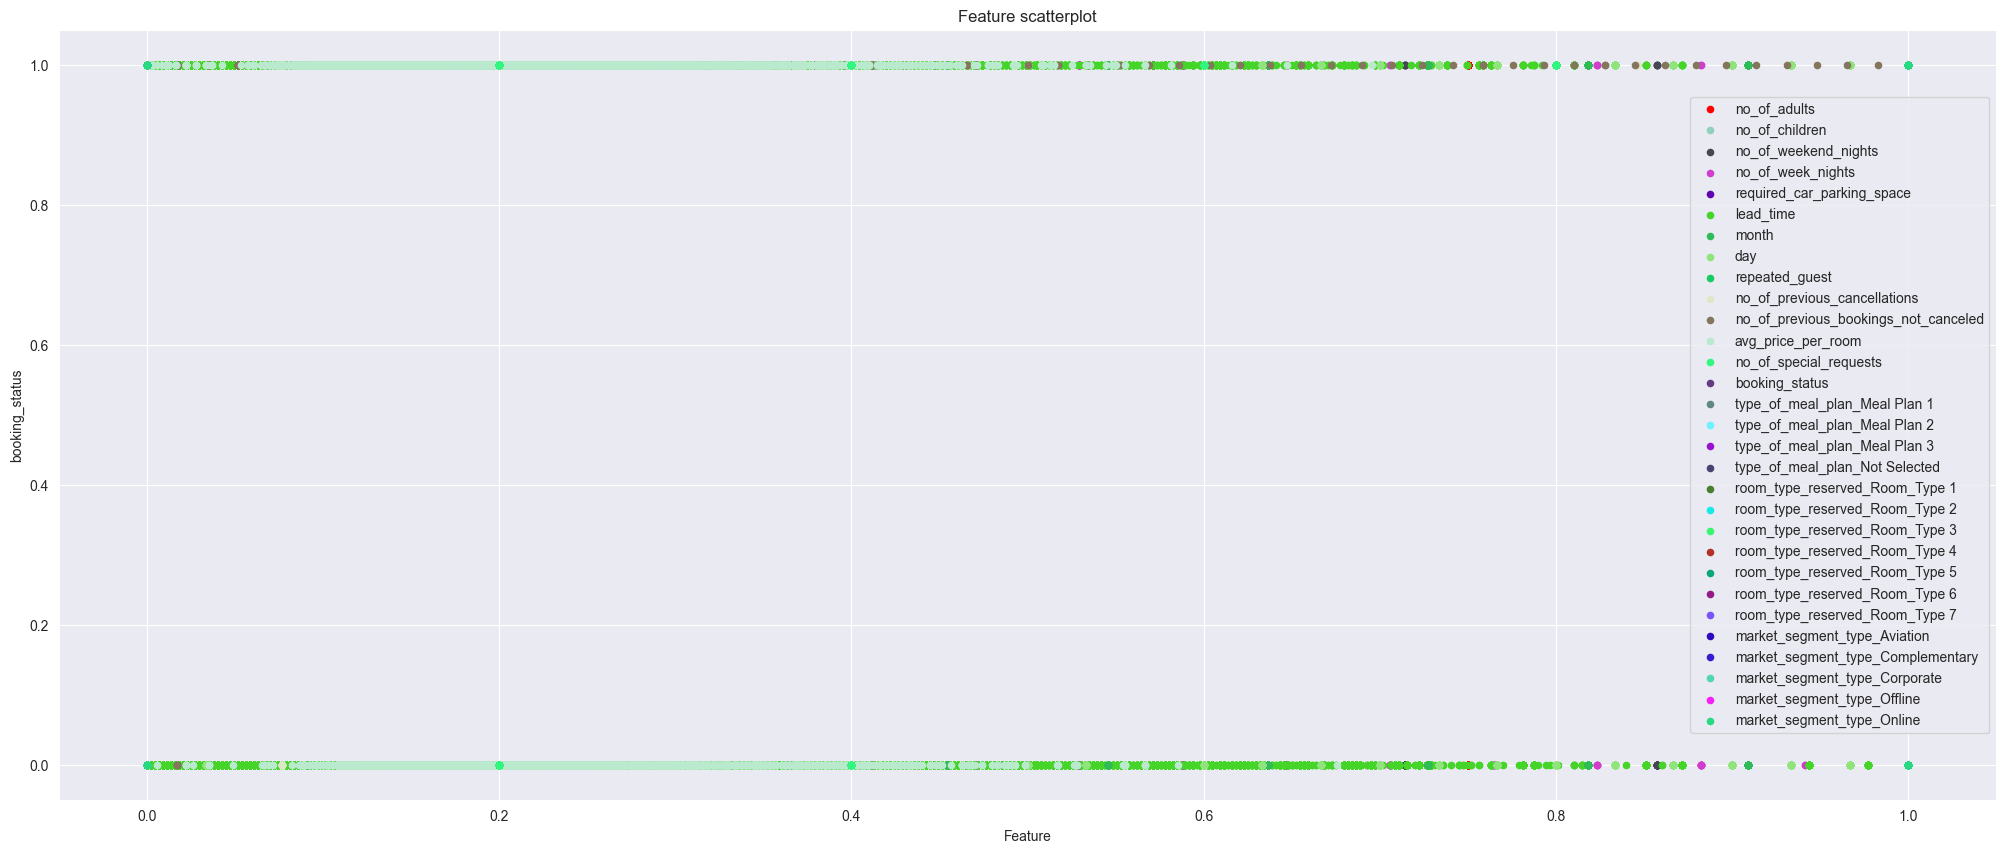

In [97]:
import random

axis = df_normalized.plot.scatter(x="no_of_adults", y="booking_status", label="no_of_adults", color="r", figsize=(25,10))

for column in df_normalized.columns[1:]:
    color = (random.random(), random.random(), random.random())
    df_normalized.plot.scatter(x=column, y="booking_status", label=column, color=color, ax=axis)
axis.set_xlabel("Feature")
axis.set_title("Feature scatterplot")
plt.show()

df_target = pd.DataFrame()["target"] = df_normalized["booking_status"]
df_normalized.drop("booking_status", axis=1, inplace=True)

Based on the graph above, the data repersents a relationship where each classification of data can be seperated with a straight line, meaning a linear PCA-based decomposition should be able to accurately seperate the data. Combined with our data now being normalized, we need to identify the number of components we should be reducing our data to, so that we have as few dimensions as possible to handle while still being able to explain as much of our data's variance as possible. To do this, we will generate several normal PCAs and compare the resulting eigenvalues against the Kaiser rule to determine the ideal set of components for later analysis and clustering.

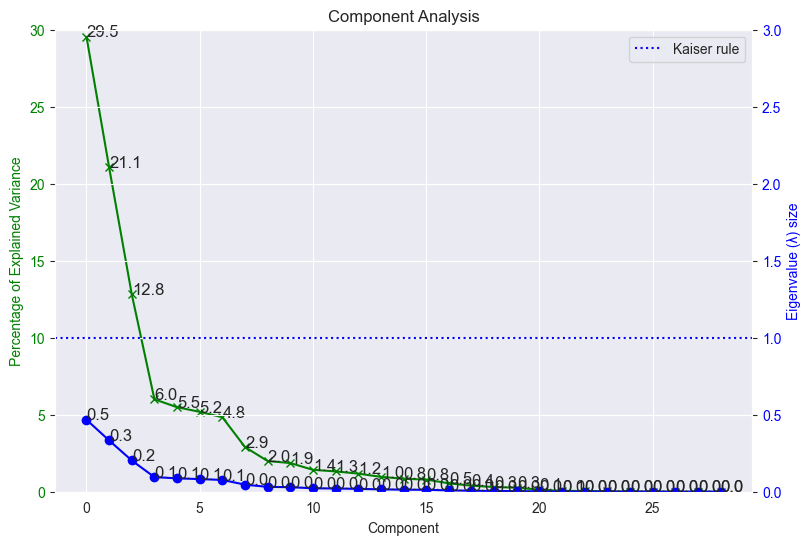

Amount of variance explained by all components s.t. λ_component > 1: 0%


In [98]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=df_normalized.shape[1], svd_solver="full")
pca_results = pca.fit_transform(df_normalized)

color_var = "#008000"
color_eig = "#0000FF"
cutoff = 1
fig, ax_var = plt.subplots(figsize=(9,6))
ax_eig = ax_var.twinx()
ax_var.set_xlabel("Component")
ax_var.set_title("Component Analysis")
ax_var.set_ylim(0, 30)
ax_eig.set_ylim(0, 3)

ax_var.plot(pca.explained_variance_ratio_ * 100, marker="x", color=color_var)
ax_var.set_ylabel('Percentage of Explained Variance', color=color_var)
ax_var.tick_params(axis="y", labelcolor=color_var)

ax_eig.plot(pca.explained_variance_, marker="o", color=color_eig)
ax_eig.set_ylabel("Eigenvalue (λ) size", color=color_eig)
ax_eig.tick_params(axis="y", labelcolor=color_eig)
ax_eig.axhline(y=cutoff, linestyle=":", label="Kaiser rule", color=color_eig)

intersection = np.argwhere(np.diff(np.sign(cutoff - pca.explained_variance_))).flatten()
if len(intersection) == 0:
    num_components = len(pca.explained_variance_)
else:
    num_components = intersection[0] - 1
    ax_eig.axvline(x=num_components, linestyle="dashed", label="Component %d" %(num_components + 1), color="red")
sum = 0
for index in range(num_components):
    if(len(intersection) > 0):
        sum = sum + (pca.explained_variance_ratio_[index] * 100).round(1)
    ax_var.text(index, pca.explained_variance_ratio_[index] * 100, (pca.explained_variance_ratio_[index] * 100).round(1), size=12)
    ax_eig.text(index, pca.explained_variance_[index], pca.explained_variance_[index].round(1), size=12)
    
ax_eig.legend(loc="upper right")
plt.show()
print("Amount of variance explained by all components s.t. λ_component > 1: " + str(sum) + "%")

As our overall variance in the dataset ends up being pretty low, we end up seeing that none of our principal components meet the "kaiser rule" rule-of-thumb that is used within factor analysis. While this may constitute an unstable relationship between the components and the target result, we can see that in the given dataset we can still explain the majority (63%) of our data within 3 components, and the vast majority (85%) within 7 components (with >99% after 20). This does not bode well for clustering applications, but can be applied nonetheless to see if any interesting relationships between components can be drawn.

Author's note: probably going to be a linear unless we end up finding that more complex transformations would be useful

#### Clustering (TODO)

Probably going to use WCSS & the elbow method, but implementing DBSCAN might be worth examining as well (they both automatically determine the number of clusters/groups/communities in a dataset)

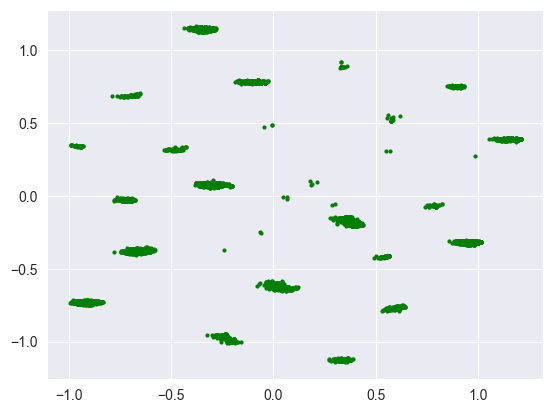

[-1 -1 -1 -1 -1 -1 -1]


In [99]:
from sklearn.cluster import DBSCAN

plt.plot(pca_results[:,0], pca_results[:,1], "go", markersize=2)
plt.show()
cluster_results = DBSCAN().fit(pca.components_[:7])
print(cluster_results.labels_)

# Uniform Manifold Approximation

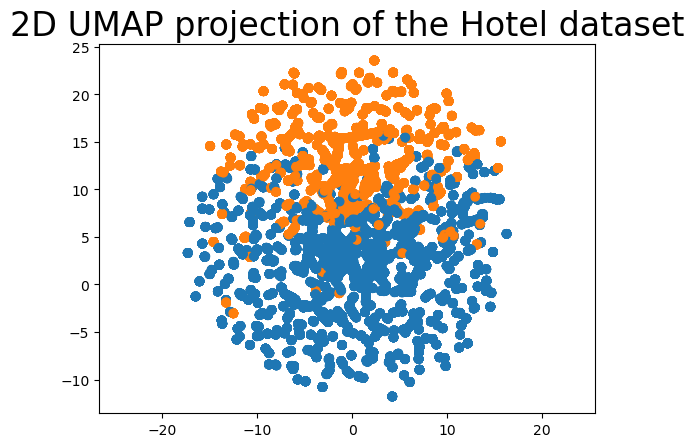

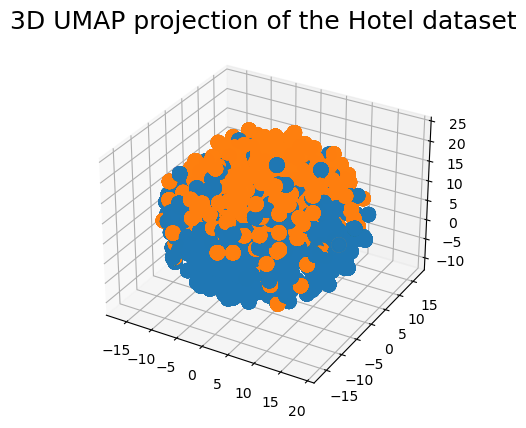

In [8]:
import umap
import umap.plot
import pandas as pd
from sklearn.utils import Bunch
import warnings
warnings.filterwarnings('ignore')

import numpy as np

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


def draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(data);
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], range(len(u)), c=class_color)
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], u[:,1], c=class_color)
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(u[:,0], u[:,1], u[:,2],  c=class_color, s=100)
    plt.title(title, fontsize=18)

df = pd.read_csv("Hotel Reservations.csv")
df.head()

# drop booking id
df.drop('Booking_ID', axis=1, inplace=True)

# define maps for string variables
map1 = {'Not Selected':0, 'Meal Plan 1':1, 'Meal Plan 2':2}
map2 = {'Room_Type 1':1, 'Room_Type 2':2, 'Room_Type 3':3, 'Room_Type 4':4, 'Room_Type 5':5, 'Room_Type 6':6 }
map3 = {'Offline':0, 'Online':1, 'Corporate':2, 'Aviation':3, 'Complementary':4}
map4 = {'Not_Canceled':0, 'Canceled':1}

# convert strings to integers
df.type_of_meal_plan = df.type_of_meal_plan.map(map1)
df.room_type_reserved = df.room_type_reserved.map(map2)
df.market_segment_type = df.market_segment_type.map(map3)
df.booking_status = df.booking_status.map(map4)

# drop any NaN's (should be none, but just in case)
df = df.dropna()
df.head()

# get columns for scaling
df_data = df[
    [

        "required_car_parking_space", "room_type_reserved", "lead_time", 
         "market_segment_type","repeated_guest", "no_of_previous_cancellations",
        "no_of_previous_bookings_not_canceled", "no_of_special_requests", "booking_status",
        
    ]
].values

# shift mean to center and scale by std deviation
scaled_df_data = StandardScaler().fit_transform(df_data)

# init UMAP
reducer = umap.UMAP(
n_neighbors=15, min_dist=0.1, n_components=3, metric='euclidean'
)

# fit data
embedding = reducer.fit_transform(scaled_df_data)

# draw scatter plot (not too useful as this data doesn't seperate as nicely as things like measured lenghts of objects)
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in df.booking_status])
plt.gca().set_aspect('equal', 'datalim')
plt.title('2D UMAP projection of the Hotel dataset', fontsize=24);

# draw umap for various neighbor sizes
data = scaled_df_data
# assign each booking status a color used for 3d plot
class_color = [sns.color_palette()[x] for x in df.booking_status]

# draw umap in 3 dimensions
draw_umap(n_components=3, title='3D UMAP projection of the Hotel dataset')


# References
# https://umap-learn.readthedocs.io/en/latest/basic_usage.html
# https://umap-learn.readthedocs.io/en/latest/parameters.html

# https://umap-learn.readthedocs.io/en/latest/plotting.html

# Also useful link
# https://scikit-learn.org/stable/tutorial/index.html


# Varying UMAP min_dist

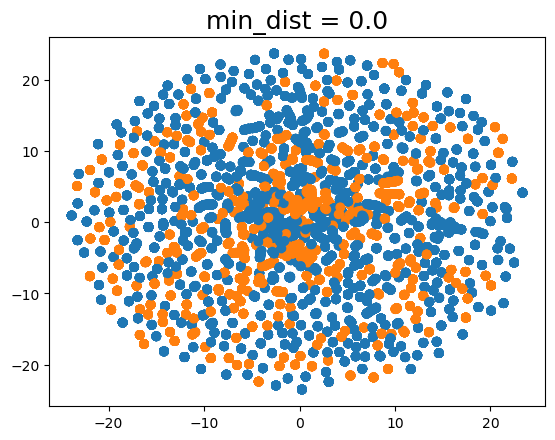

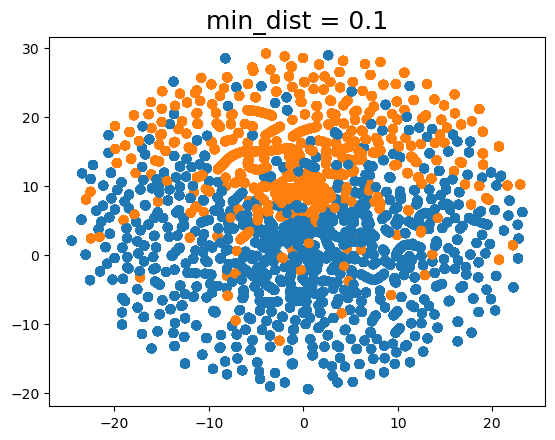

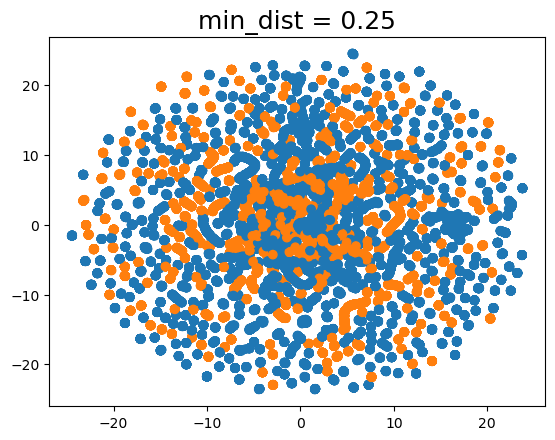

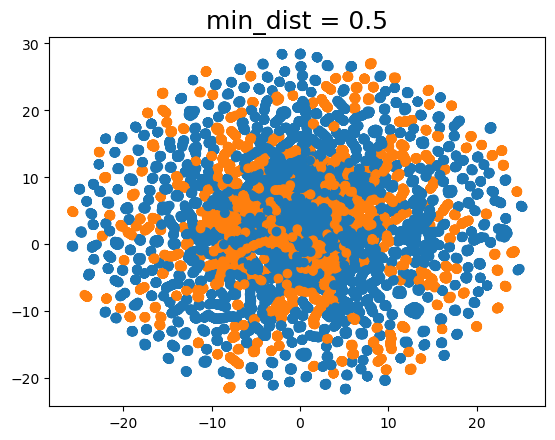

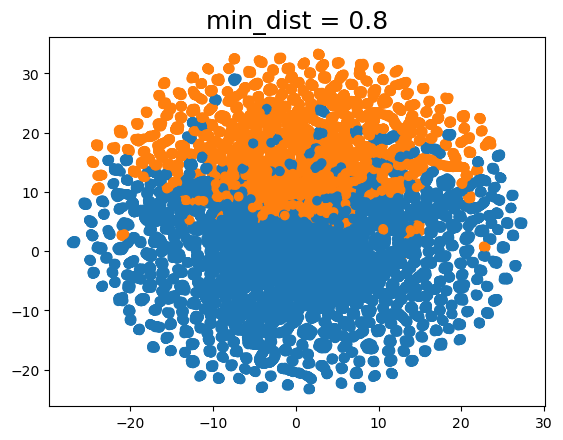

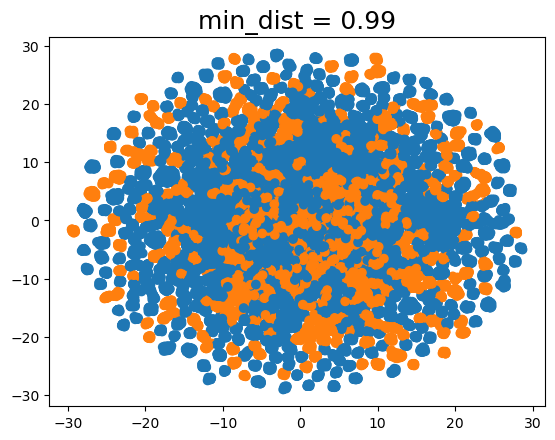

In [2]:
import umap
import umap.plot
import pandas as pd
from sklearn.utils import Bunch
import warnings
warnings.filterwarnings('ignore')

import numpy as np

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


def draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(data);
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], range(len(u)), c=class_color)
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], u[:,1], c=class_color)
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(u[:,0], u[:,1], u[:,2],  c=class_color, s=100)
    plt.title(title, fontsize=18)

df = pd.read_csv("Hotel Reservations.csv")
df.head()

# drop booking id
df.drop('Booking_ID', axis=1, inplace=True)

# define maps for string variables
map1 = {'Not Selected':0, 'Meal Plan 1':1, 'Meal Plan 2':2}
map2 = {'Room_Type 1':1, 'Room_Type 2':2, 'Room_Type 3':3, 'Room_Type 4':4, 'Room_Type 5':5, 'Room_Type 6':6 }
map3 = {'Offline':0, 'Online':1, 'Corporate':2, 'Aviation':3, 'Complementary':4}
map4 = {'Not_Canceled':0, 'Canceled':1}

# convert strings to integers
df.type_of_meal_plan = df.type_of_meal_plan.map(map1)
df.room_type_reserved = df.room_type_reserved.map(map2)
df.market_segment_type = df.market_segment_type.map(map3)
df.booking_status = df.booking_status.map(map4)

# drop any NaN's (should be none, but just in case)
df = df.dropna()
df.head()

# get columns for scaling
df_data = df[
    [

        "required_car_parking_space", "room_type_reserved", "lead_time", 
         "market_segment_type","repeated_guest", "no_of_previous_cancellations",
        "no_of_previous_bookings_not_canceled", "no_of_special_requests", "booking_status",
        
    ]
].values

# shift mean to center and scale by std deviation
scaled_df_data = StandardScaler().fit_transform(df_data)

# draw umap for various neighbor sizes
data = scaled_df_data
# assign each booking status a color used for 3d plot
class_color = [sns.color_palette()[x] for x in df.booking_status]

# draw umap for various min_dist
for d in (0.0, 0.1, 0.25, 0.5, 0.8, 0.99):
    draw_umap(min_dist=d, title='min_dist = {}'.format(d))


# References
# https://umap-learn.readthedocs.io/en/latest/basic_usage.html
# https://umap-learn.readthedocs.io/en/latest/parameters.html

# https://umap-learn.readthedocs.io/en/latest/plotting.html

# Also useful link
# https://scikit-learn.org/stable/tutorial/index.html

# UMAP Results
From the projections you can see clustering on the top side of the 3d projection as well as on the top side of the 2D projection showing clearing defined clustering of cancelled and honored reservations. The min_dist of 0.8 does a better job of creating spatial seperation of the two classes when compared to the other parameters. This dimension reduction technique does a good job of taking into consideration the geometry of the features in addition to their relative distances and I think it can be useful in many applications depending on the dataset.
